#**Name** - Pawan Sorte 
#**Email ID** - pawan.sorte@mitaoe.ac.in
#**Preference** - Machine Learning


#**Problem Statement** - Implement the Linear Regression algorithm from scratch in Python using Numpy and Pandas and Matplotlib for visualization.

#The algorithm must be implemented as a function with arguments, x_train (the features) and y_train (the output).

#The Code is written and compiled in Google Colab 
#**Python Version - 3.9**


#First install the allowable libraries

In [502]:
#The libraries are saved as their alias names for easier function calling.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Then upload dataset in to the environment.

In [503]:
reg_df = pd.read_csv(r'/content/Medical Price Dataset (2).csv')

In [504]:
reg_df.shape

(1338, 7)

#Find out the null values in the dataset.

In [505]:
#First we will find out any missing values in the dataset
reg_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#The dataset seems to have zero null values so skipping the data filler stage.

#Visualize the number of the beneficiaries in terms of gender.

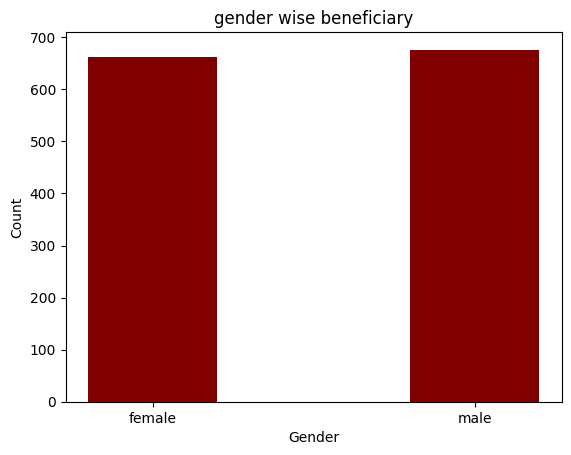

In [506]:
female = (reg_df['sex'] == 'female').sum() #in female variable no. of times female appeared is stored
male = (reg_df['sex'] == 'male').sum() #same is for the male variable

gender = ["female" , "male"] #list of labels
count = [female , male] #format them in list for easier transfer
plt.bar(gender, count, color ='maroon', width = 0.4)
 
plt.xlabel("Gender") #plot the data
plt.ylabel("Count")
plt.title("gender wise beneficiary")
plt.show()

#Data Discretization

Data discretization techniques are used when multiple string values are converted to continuous or boolean values.

In [507]:
reg_df.replace({'sex':{'male': 0 , 'female' : 1}}, inplace = True) #Since there are only two genders present in dataset convert them to zero and 1

reg_df.replace({'smoker':{'yes': 1 , 'no' : 0}}, inplace = True) # same for the smokers and non-smokers.

reg_df.replace({'region':{'southeast': 0 , 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}}, inplace = True) # region has 4 unique values so it will be converted to numeric values.

reg_df # display the dataset.

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


#Correlation Analysis

In [508]:
dataset2  = reg_df.drop(columns = 'charges')

<Axes: title={'center': 'Correlation with charges'}>

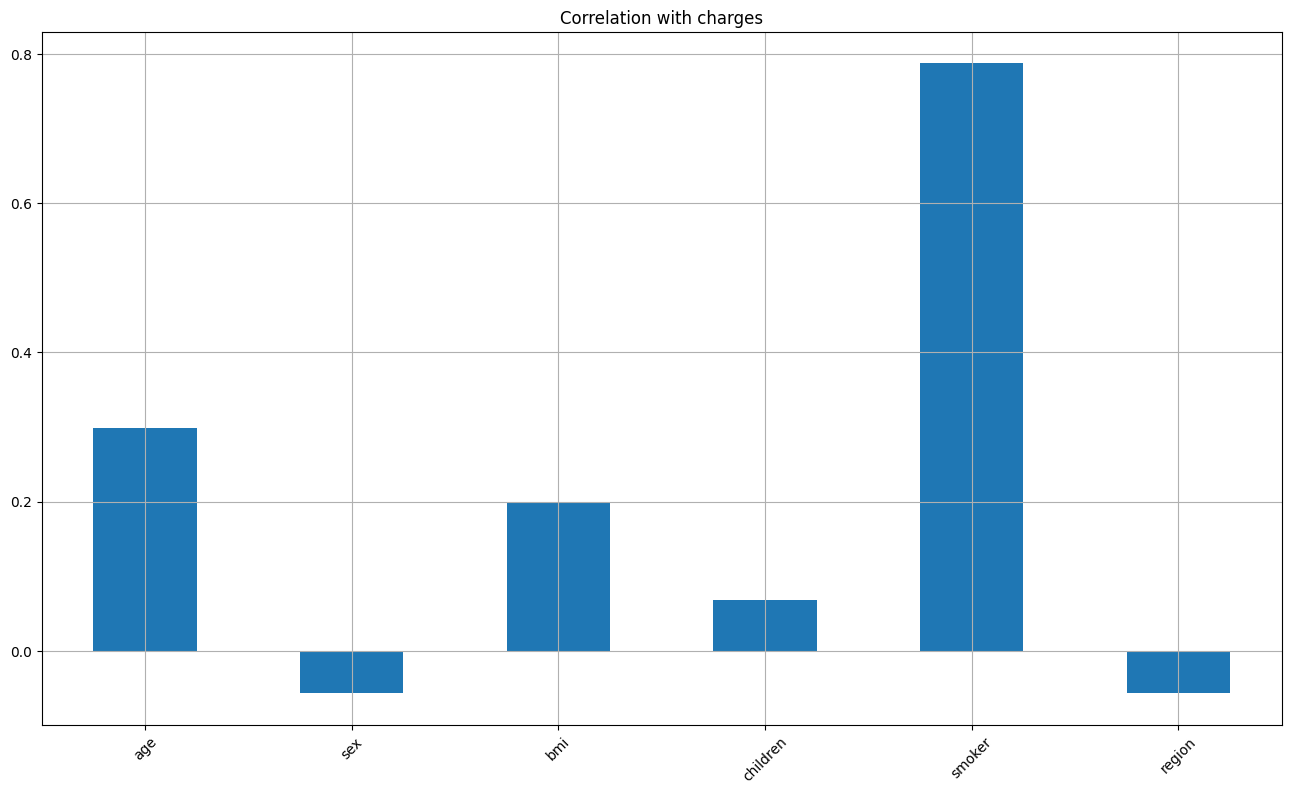

In [509]:
dataset2.corrwith(reg_df['charges']).plot.bar(
    figsize = (16,9) , title = "Correlation with charges" , rot=45,grid = True
)

We can see that the smoker column is highly correlated with the charges

#Outlier Removal

In [510]:
reg_df.describe() # get a feel on what does the dataset denotes.

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [511]:
min_threeshold , max_threshold = reg_df.charges.quantile([0.024,0.7800])
min_threeshold , max_threshold

(1629.9949624, 18971.1897688)

In [512]:
reg_df[reg_df.charges < min_threeshold]

,age,sex,bmi,children,smoker,region,charges
22,18,0,34.100,0,0,0,1137.01100
35,19,0,20.425,0,0,3,1625.43375
77,21,0,35.530,0,0,0,1532.46970
136,19,0,34.100,0,0,1,1261.44200
194,18,0,34.430,0,0,0,1137.46970
236,18,1,26.730,0,0,0,1615.76670
359,18,1,20.790,0,0,0,1607.51010
374,20,0,33.330,0,0,0,1391.52870
385,19,0,34.400,0,0,1,1261.85900
410,19,0,17.480,0,0,3,1621.34020


In [513]:
reg_df[reg_df.charges > max_threshold]

,age,sex,bmi,children,smoker,region,charges
3,33,0,22.705,0,0,3,21984.47061
9,60,1,25.840,0,0,3,28923.13692
11,62,1,26.290,0,1,0,27808.72510
14,27,0,42.130,0,1,0,39611.75770
19,30,0,35.300,0,1,1,36837.46700
...,...,...,...,...,...,...,...
1318,35,0,39.710,4,0,2,19496.71917
1321,62,0,26.695,0,1,2,28101.33305
1323,42,1,40.370,2,1,0,43896.37630
1328,23,1,24.225,2,0,2,22395.74424


In [514]:
reg_df = reg_df[(reg_df.charges<max_threshold) & (reg_df.charges>min_threeshold)]
reg_df.shape

(1010, 7)

#Split the data for training and testing columnwise

In [515]:
x = reg_df.drop(columns = 'charges', axis = 1) #The x variable will store the independant variables columns since charges is dependant drop it
y = reg_df['charges'] #Y will store dependant variable's columns

In [516]:
x['bmi'] = x['bmi'].fillna(x['bmi'].mean()).astype(int) #later in the code it was found that due to unknown reasons bmi outputted NaN values so for precautionary measures do this
x

,age,sex,bmi,children,smoker,region
0,19,1,27,0,1,1
1,18,0,33,1,0,0
2,28,0,33,3,0,0
4,32,0,28,0,0,3
5,31,1,25,0,0,0
...,...,...,...,...,...,...
1331,23,1,33,0,0,1
1332,52,1,44,3,0,1
1333,50,0,30,3,0,3
1334,18,1,31,0,0,2


#Split the columns into row wise forms to get 4 datasets

In [517]:
x_train = x[:858] # this functions splits the x to x_train having first 1070 rows
x_test = x[859:] #this function splits the x to have x_test to have rows from 1070 onwards

y_train = y[:858] #doing the same for y_train and Y_test
y_test = y[859:]

y_train_reshape = y_train.values.reshape(-1,1) #reshape the training and testing dataset so that it becomes a dataframe from a series.
y_test_reshape = y_test.values.reshape(-1,1) 

In [518]:
y_test.shape


(151,)

#Define the function for linear regresssion.

In [519]:
class lin_reg:                         #fit all the function in a class named lin_reg
  def __init__(self , le_ra = 0.0001, n_iter = 10000):    #define a constructor class having all local variables.
    self.le_ra = le_ra  #learning rate set to 0.0001
    self.n_iter = n_iter  #number of iterations
    self.weights = 0  #Weights for each class
    self.bias = 0    #bias for each class
  

  def fit_graph(self, x_train, y_train):   #the function is defined for fitting the graph.
      sample_space , no_of_features = x_train.shape
      self.bias = 0

      for iter in range(self.n_iter):
        y_pred = np.dot(x_train , self.weights) + self.bias

        dw = (1/sample_space) * np.dot(x_train.T , (y_pred - y_train))
        db = (1/sample_space) * np.sum(y_pred - y_train)

        self.weights = self.weights - self.le_ra * dw
        self.bias = self.bias - self.le_ra * db


  def predict_results(self , x_testt):  # the fitted model is used for predicting data using iterative parameter optimization.
    y_pred = np.dot(x_testt , self.weights) + self.bias
    return y_pred

#Driver code for above mentioned class

In [520]:
reg = lin_reg()  #initializing the class
reg.fit_graph(x_train , y_train_reshape)  #calling the class
predicted_values = reg.predict_results(x_test)



#Define a function for returning squared error

In [521]:
def se(y_test , predicted_values):  #a simple function for squared error calculation for each y_test value.
  return np.mean(((y_test - predicted_values)))

#Call the function and find the square for getting its mean squared error

In [522]:
#mean_sq_err = se(y_test_reshape, predicted_values)   #Using square of each function get mean squared error
#print((mean_sq_err)**2)

#Call the function predict to get co-ordinates for the line of the predicted function.

In [523]:
y_pred_lines = reg.predict_results(x_test)    #call the function for each x_test value

#Due to number of outliers in the dataset the model is going to be less accurate. We can apply parameter optimization for the same.

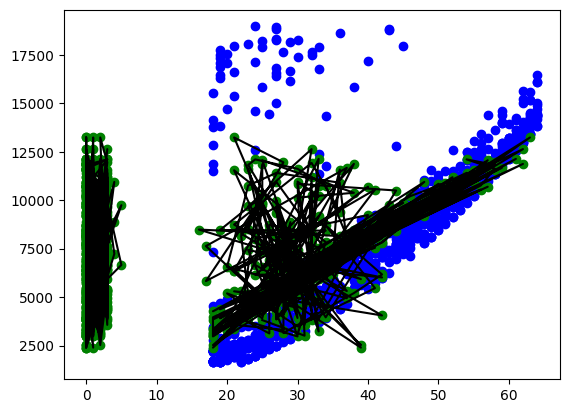

In [524]:
m1 = plt.scatter(x_train['age'],y_train, color = 'blue', label = 'Actual')
m2 = plt.scatter(x_test,y_pred_lines, color = 'green', label = 'Predicted')
plt.plot(x_test, y_pred_lines, color='black', label='Predicted Line') #plot the preedictions on the graph.

#Calculation Of Accuracy in predicted values.

In [525]:
def calculate_accuracy(y_true, y_pred):

    # Calculate the mean absolute error (MAE)
    mae = np.mean(np.abs(y_true - y_pred))

    # Calculate the mean value of y_true
    mean_y = np.mean(y_true)

    # Calculate the mean absolute percentage error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / mean_y))

    # Calculate the accuracy as 1 - MAPE
    accuracy = 1 - mape

    return accuracy

In [526]:
z = calculate_accuracy(y_test_reshape,y_pred_lines) # call the calculate accuracy function.
z

0.6970616594121047

#The Accuracy came out to be 69.7% which is less, due to the large number of outliers. 